Bước 1: Nhập các thư viện Python cần thiết

In [1]:
import numpy as np
from matplotlib import pyplot as plt


Bước 2: Xác định Hàm Kích Hoạt: Hàm Sigmoid

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


Bước 3: Khởi tạo các tham số mạng nơ-ron và siêu tham số mô hình

![image.png](attachment:image.png)

In [3]:
# Model to learn the XOR truth table 
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input
Y = np.array([[0, 1, 1, 0]]) # XOR output
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))

    parameters = {"W1": W1, "b1": b1,
                  "W2": W2, "b2": b2}
    return parameters

neuronsInHiddenLayers = 2  # số lượng nơ-ron trong lớp ẩn
inputFeatures = X.shape[0]  # số lượng đặc trưng đầu vào
outputFeatures = Y.shape[0]  # số lượng đặc trưng đầu ra
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)

epoch = 100000  # số lần lặp huấn luyện
learningRate = 0.01  # tốc độ học
losses = np.zeros((epoch, 1))  # mảng để lưu giá trị mất mát trong quá trình huấn luyện


Bước 4: Lan truyền thuận (Forward Propagation)

In [4]:
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2


Bước 5: Lan truyền ngược (Backward Propagation)

In [5]:
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1 - A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients


Bước 6: Cập nhật các tham số trọng số và sai số

In [6]:
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters


Bước 7: Huấn luyện mô hình

In [7]:
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)


Bước 8: Vẽ Biểu đồ Giá trị Mất mát so với Epoch

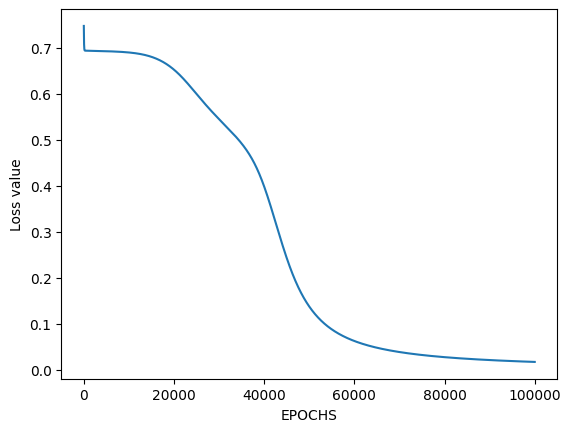

In [8]:
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()


Bước 9: Kiểm tra hiệu suất của mô hình

In [9]:
X_test = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])   # XOR input
cost, _, A2_test = forwardPropagation(X_test, Y, parameters)
predictions = (A2_test > 0.5) * 1.0
print("Giá trị của cặp input đầu vào")
print(X_test)
print("=============")
print("Giá trị sau khi dự đoán của output là chính xác!")
print(predictions.astype(int))


Giá trị của cặp input đầu vào
[[1 1 0 0]
 [0 1 0 1]]
Giá trị sau khi dự đoán của output là chính xác!
[[1 0 0 1]]


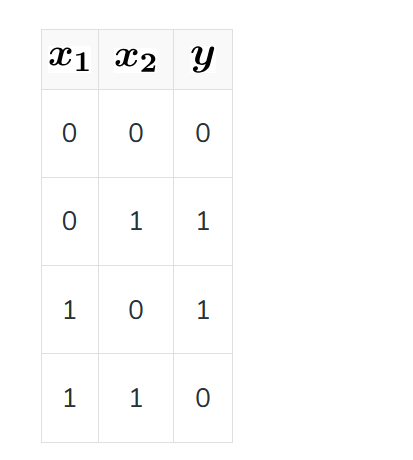